In [1]:
from sklearn import datasets
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

iris_dataset=datasets.load_iris()

In [67]:
print ("Iris dataset", iris_dataset['DESCR'])
#and it's input data
print("Iris feature data",iris_dataset['data'])
#and the target values
print("Iris results", iris_dataset['target'])

Iris dataset Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Va

In [26]:
def data_visualization():
    iris=datasets.load_iris()
    x=iris.data[:,:4] #this is taking only the first two features of Iris
    y=iris.target 
    plt.scatter(x[:,0],x[:,1],c=y)
    
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Sepal Width and Length')
    plt.show()
    plt.scatter(x[:,2],x[:,3],c=y)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title('Petal Width and Length')
    
    plt.show()
    

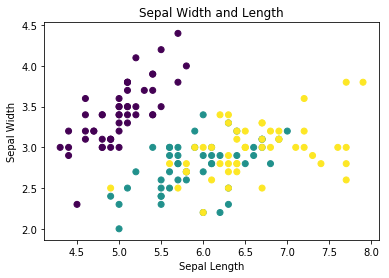

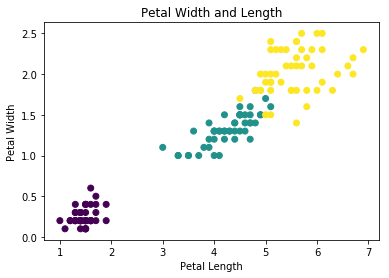

In [27]:
data_visualization()

By Visulizing the data we can see that, a better classification can be achieved by using values of petals but we should try both to check before we make a statement. 

In [50]:
#function to classify as per sepal length
iris=datasets.load_iris()
X=iris.data[:,:2]
Y=iris.target
C=80 #Regularizing parameter

svc=svm.SVC(kernel='linear',C=C).fit(X,Y)
#classification with a linear kernel

rbf_kernel=svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)
#classification with a radial basis kernel

poly_svc=svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)
#classification with polynomial kernel of degree 3



We'll need a mesh to plot our results in and then plot the decision boundries which the classifier will decide and then we can color code the regions for better visualization. 

We'll first use Sepal as our feature set.

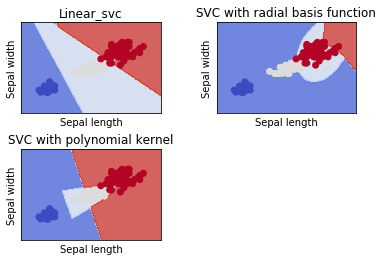

In [73]:
h=0.04

x_min, x_max= X[:,0].min()-1,X[:,0].max()+1
y_min, y_max= X[:,1].min()-1,X[:,1].max()+1

xx, yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

titles=['Linear_svc',"SVC with radial basis function","SVC with polynomial kernel"]

for i, clf in enumerate((svc,rbf_kernel,poly_svc)):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
plt.show()

In [63]:
iris=datasets.load_iris()
X=iris.data[:,2:]
Y=iris.target
C=80
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)
lin_svc = svm.LinearSVC(C=C).fit(X, Y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)



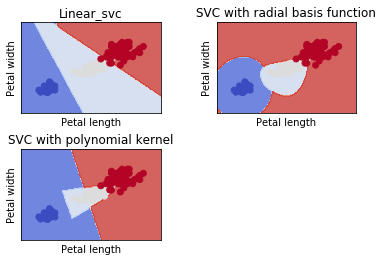

In [72]:
h = .04  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# title for the plots
titles = ['Linear_svc','SVC with radial basis function','SVC with polynomial kernel']
 
 
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
    
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
plt.show()